AVOCADO CASE STUDY

In [234]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [235]:
avocado=pd.read_csv('Avocado.csv',sep='\t')
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [236]:
df=pd.DataFrame(data=avocado)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Checking for missing values

In [237]:
df.shape

(18249, 14)

In [238]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [239]:
df['XLarge Bags'].nunique()

5588

In [240]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [241]:
df['region'].nunique()

54

In [242]:
df['Date'].nunique()

169

In [243]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [244]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [245]:
#separating the target column from the independent features
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [247]:
#encoding the region column using label encoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])


In [248]:
df['type']=le.fit_transform(df['type'])


<AxesSubplot:>

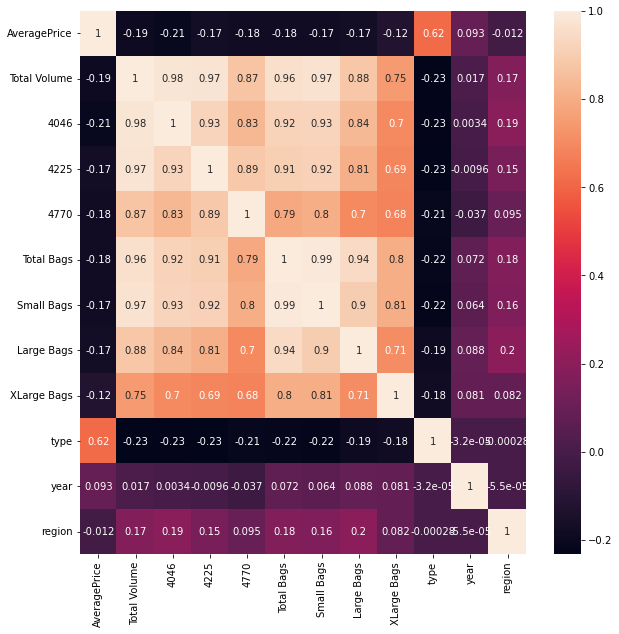

In [249]:

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Almost all the columns show signs of multicollinearity
Further investigation on the same

In [250]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [251]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [252]:
df_n=df.drop('Date',axis=1)

In [253]:
df_n=df_n.drop('region',axis=1)

In [254]:
df_n=df_n.drop('type',axis=1)

In [255]:

print(calc_vif(df_n))

      Variables    VIF factor
0  AveragePrice  1.391351e+01
1  Total Volume  5.204945e+09
2          4046  6.937023e+08
3          4225  6.323877e+08
4          4770  4.966241e+06
5    Total Bags  2.502000e+14
6    Small Bags  1.429714e+14
7    Large Bags  1.521486e+13
8   XLarge Bags  7.855161e+10
9          year  1.424078e+01


<AxesSubplot:>

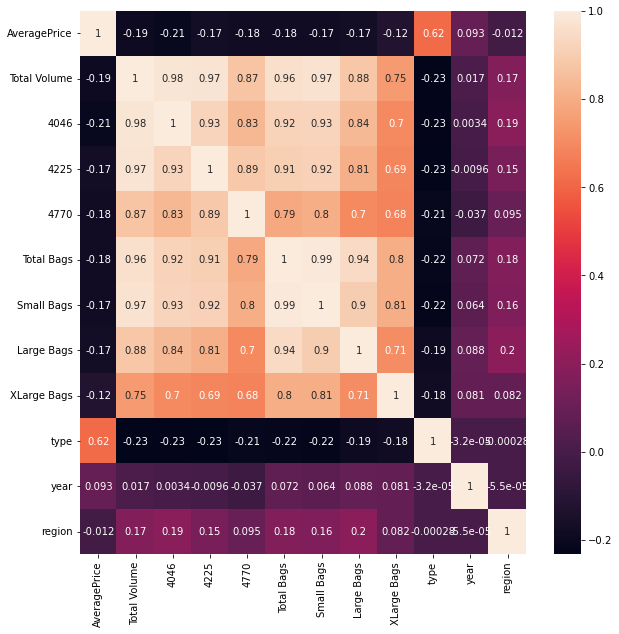

In [256]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

The columns small bags,Large Bags,XLarge Bags are highly colinear with the total bags as they are being explained  by the total bags columns itself,hence dropping them should.not have a significant effect on the model performance

In [257]:
df.drop('Total Bags',axis=1,inplace=True)
#df.drop('Large Bags',axis=1,inplace=True)
#df.drop('XLarge Bags',axis=1,inplace=True)
#df.head()

The features 4046,4225,4770 show high colinearity with total volume as they are being explained by the feature already.

In [258]:
df.drop('Total Volume',axis=1,inplace=True)
#df.drop('4225',axis=1,inplace=True)
#df.drop('4770',axis=1,inplace=True)
#df.head()

In [259]:
df['year'].nunique()

4

In [260]:
df['year']=le.fit_transform(df['year'])
df['year'].unique()

array([0, 1, 2, 3], dtype=int64)

In [261]:
#since we already have the year column,the date column is not significant 
df.drop('Date',axis=1,inplace=True)

In [262]:
x1=df.drop('AveragePrice',axis=1)
y1=df['AveragePrice']
df.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0


REGRESSION (AVERAGE PRICE PREDICTION)

EDA

In [263]:
calc_vif(x1)

,Variables,VIF factor
0,4046,10.628848
1,4225,14.077990
2,4770,5.595269
3,Small Bags,20.647290
4,Large Bags,5.833962
5,XLarge Bags,3.517597
6,type,1.785626
7,year,1.979974
8,region,2.371146


In [264]:
df.describe()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,2.930084e+05,2.951546e+05,2.283974e+04,1.821947e+05,5.433809e+04,3106.426507,0.499918,1.147899,26.495644
std,0.402677,1.264989e+06,1.204120e+06,1.074641e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.100000,8.540700e+02,3.008780e+03,0.000000e+00,2.849420e+03,1.274700e+02,0.000000,0.000000,0.000000,13.000000
50%,1.370000,8.645300e+03,2.906102e+04,1.849900e+02,2.636282e+04,2.647710e+03,0.000000,0.000000,1.000000,26.000000
75%,1.660000,1.110202e+05,1.502069e+05,6.243420e+03,8.333767e+04,2.202925e+04,132.500000,1.000000,2.000000,40.000000
max,3.250000,2.274362e+07,2.047057e+07,2.546439e+06,1.338459e+07,5.719097e+06,551693.650000,1.000000,3.000000,53.000000


In [265]:
df.skew()

AveragePrice     0.580303
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

<AxesSubplot:>

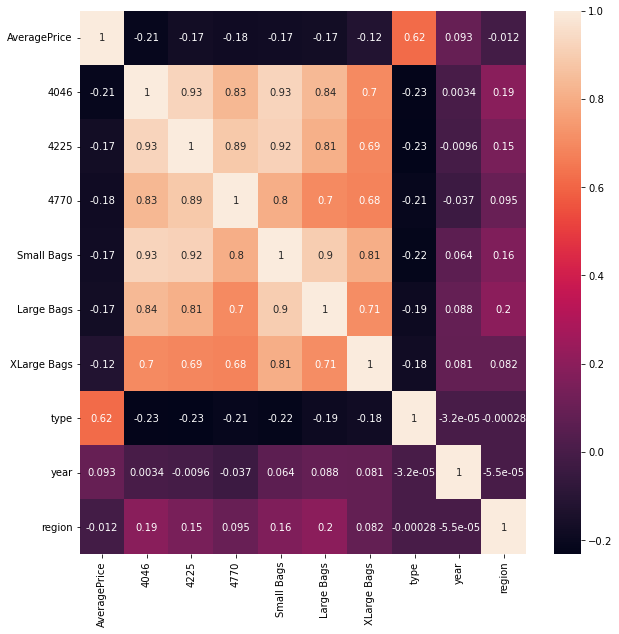

In [266]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [267]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(df)
sc_scale=sc.transform(df)


spca=pd.DataFrame(data=sc_scale)
spca

,0,1,2,3,4,5,6,7,8,9
0,-0.188689,-0.230816,-0.199902,-0.212091,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282,-1.700252
1,-0.139020,-0.231103,-0.208054,-0.211997,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282,-1.700252
2,-1.182069,-0.231007,-0.154478,-0.211325,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282,-1.700252
3,-0.809551,-0.230741,-0.185350,-0.211864,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282,-1.700252
4,-0.312861,-0.230891,-0.208719,-0.211834,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282,-1.700252
...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,-0.230017,-0.243857,-0.212540,-0.226665,-0.220964,-0.17558,1.000164,1.970504,1.700811
18245,0.755023,-0.230693,-0.242277,-0.212540,-0.232196,-0.221403,-0.17558,1.000164,1.970504,1.700811
18246,1.152375,-0.230693,-0.243090,-0.205766,-0.231644,-0.222561,-0.17558,1.000164,1.970504,1.700811
18247,1.301382,-0.230428,-0.242651,-0.205774,-0.229543,-0.222529,-0.17558,1.000164,1.970504,1.700811


In [268]:
from sklearn.decomposition import PCA

x2=sc_scale[:,1:]
y2=sc_scale[:,0]
pca_=PCA(n_components=3)
pca_.fit(x2)
x2_pca=pca_.transform(x2)
s_pca=pd.DataFrame(data=x2_pca)
s_pca

,0,1,2
0,-0.561300,-1.744874,1.469624
1,-0.564331,-1.744277,1.469666
2,-0.542351,-1.748062,1.469520
3,-0.556696,-1.746035,1.469564
4,-0.566259,-1.744408,1.469630
...,...,...,...
18244,-0.470672,2.442725,-1.238460
18245,-0.472838,2.442368,-1.238437
18246,-0.470755,2.441556,-1.238176
18247,-0.469551,2.441608,-1.238183


In [269]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

MACHINE LEARNING PHASE

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=.33,random_state=101)

In [272]:
x_test.shape

(6023, 9)

In [273]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [274]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print('score: ',lr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_lr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_lr))
print("r2 score: ",r2_score(y_test,pred_lr))


score:  0.4133744987303023
mean_squared error:  0.6107413260377219
mean_absolute_error:  0.5964590795586605
r2 score:  0.3928461983342767


LinearRegression model performed poorly

In [275]:
len(x_train)

12226

L1 and L2 REGULARIZATION

In [276]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [277]:
#LASSO
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print("score: ",ls.score(x_train,y_train))

score:  0.4133737868506858


In [278]:
print("mean_squared error: ",mean_squared_error(y_test,pred_ls))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_ls))
print("r2 score: ",r2_score(y_test,pred_ls))

mean_squared error:  0.6107294804439561
mean_absolute_error:  0.5964384171550219
r2 score:  0.3928579743464463


In [279]:
#RIDGE
rg=Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
print("score: ",rg.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_rg))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_rg))
print("r2 score: ",r2_score(y_test,pred_rg))

score:  0.41337449873030196
mean_squared error:  0.6107413255289686
mean_absolute_error:  0.5964590789688443
r2 score:  0.39284619884004157


In [280]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
pred_knr=knr.predict(x_test)
print("score : ",knr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_knr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_knr))
print("r2 score: ",r2_score(y_test,pred_knr))

score :  0.9007387652170249
mean_squared error:  0.17261602808417692
mean_absolute_error:  0.2860326685613697
r2 score:  0.8283979268937303


In [281]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [282]:
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print("score : ",dtr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_dtr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_dtr))
print("r2 score: ",r2_score(y_test,pred_dtr))

score :  1.0
mean_squared error:  0.32260040593255734
mean_absolute_error:  0.37553585479880214
r2 score:  0.6792945646046553


USING GRID SEARCH

In [284]:
from sklearn.model_selection import GridSearchCV

In [285]:
#SVR
svr1=SVR(gamma='auto')
paramgrid={'kernel':['rbf','poly','linear']}

grid=GridSearchCV(svr1,paramgrid,cv=5)
grid.fit(x_train,y_train)
print(grid.best_score_)

print(grid.best_params_)

KeyboardInterrupt: 

In [286]:
for i in range(1,10):
    
    knr=KNeighborsRegressor(n_neighbors=i)
    knr.fit(x_train,y_train)
    pred_knr=knr.predict(x_test)
    print('iteration:',i)
    print("score : ",knr.score(x_train,y_train))
    print("mean_squared error: ",mean_squared_error(y_test,pred_knr))
    print("mean_absolute_error: ",mean_absolute_error(y_test,pred_knr))
    print("r2 score: ",r2_score(y_test,pred_knr))

iteration: 1
score :  1.0
mean_squared error:  0.22066273391068986
mean_absolute_error:  0.30180750823866753
r2 score:  0.7806334497633908
iteration: 2
score :  0.9499559944965197
mean_squared error:  0.17604746007022987
mean_absolute_error:  0.2810694779817358
r2 score:  0.8249866513067222
iteration: 3
score :  0.9287911668102506
mean_squared error:  0.1683682725442101
mean_absolute_error:  0.27951568912230895
r2 score:  0.8326207309102349
iteration: 4
score :  0.9138834793505309
mean_squared error:  0.1673428735614936
mean_absolute_error:  0.2811179265065432
r2 score:  0.8336401066492561
iteration: 5
score :  0.9007387652170249
mean_squared error:  0.17261602808417692
mean_absolute_error:  0.2860326685613697
r2 score:  0.8283979268937303
iteration: 6
score :  0.8909257672652293
mean_squared error:  0.1763158494129241
mean_absolute_error:  0.2917418977017262
r2 score:  0.8247198384961326
iteration: 7
score :  0.882185120807042
mean_squared error:  0.18164321507094341
mean_absolute_err

In [287]:
knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train,y_train)
pred_knr=knr.predict(x_test)

print("score : ",knr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_knr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_knr))
print("r2 score: ",r2_score(y_test,pred_knr))

score :  0.9499559944965197
mean_squared error:  0.17604746007022987
mean_absolute_error:  0.2810694779817358
r2 score:  0.8249866513067222


In [288]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(max_depth=2,random_state=42)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

print("score : ",rf.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_rf))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_rf))
print("r2 score: ",r2_score(y_test,pred_rf))

score :  0.4521283324117258
mean_squared error:  0.5650665283130113
mean_absolute_error:  0.5803567596678213
r2 score:  0.4382527000668256


THE KNEIGHBORS REGRESSOR PERFORMED THE BEST with n-neighbors as 2 and 3

saving the model

In [ ]:
import pickle

In [ ]:
filename='final_model(avocados).sav'
pickle.dump(svr,open(filename,'wb'))

reloading the model

In [ ]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.score(x_train,y_train)
result

CLASSIFICATION APPROACH(PREDICTING THE REGION)

In [292]:
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [369]:
df2=pd.DataFrame(avocado)
df2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [370]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [371]:
df2['Date']=le.fit_transform(df2['Date'])
df2['Date'].nunique()

169

In [372]:
list=['type','year','region']
for i in list:
    df2[i]=le.fit_transform(df2[i])
df2[i].nunique()

54

In [373]:
df2.drop('Total Bags',axis=1,inplace=True)
df2.drop('Total Volume',axis=1,inplace=True)
df2.drop('Date',axis=1,inplace=True)

In [374]:
x=df2.drop('region',axis=1)
y=df2['region']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [375]:
y.shape

(18249,)

In [376]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
lg=LogisticRegression()


In [377]:
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_lg))
print("confusion matrix:",confusion_matrix(y_test,pred_lg))
print("classification report:",classification_report(y_test,pred_lg))
#print("auc-roc score:",roc_auc_score(y_test,pred_lg))


accuracy_score: 0.16586418728208535
confusion matrix: [[ 0  0  1 ...  0  0  0]
 [ 0  5  0 ...  2  4  1]
 [ 0  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  0  0]
 [ 0  0  0 ... 15 48  0]
 [ 0  0  2 ...  2  9  9]]
classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.14      0.04      0.07       112
           2       0.33      0.38      0.36       107
           3       0.00      0.00      0.00       108
           4       0.17      0.18      0.18       114
           5       0.00      0.00      0.00       117
           6       0.11      0.37      0.17       108
           7       0.00      0.00      0.00       122
           8       0.77      0.43      0.55       115
           9       0.15      0.67      0.24       123
          10       0.00      0.00      0.00       120
          11       0.00      0.00      0.00       118
          12       0.22      0.54      0.32       105
          

In [378]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_dtc))
print("confusion matrix:",confusion_matrix(y_test,pred_dtc))
print("classification report:",classification_report(y_test,pred_dtc))
#print("auc-roc score:",roc_auc_score(y_test,pred_dtc))


accuracy_score: 0.7904698655155238
confusion matrix: [[ 84   0   0 ...   0   0   0]
 [  0  77   0 ...   0   0   3]
 [  0   0  94 ...   0   0   3]
 ...
 [  0   0   0 ... 110   0   0]
 [  0   0   0 ...   0  97   0]
 [  0   0   3 ...   0   0  75]]
classification report:               precision    recall  f1-score   support

           0       0.77      0.79      0.78       106
           1       0.66      0.69      0.68       112
           2       0.82      0.88      0.85       107
           3       0.77      0.79      0.78       108
           4       0.81      0.87      0.84       114
           5       0.73      0.70      0.72       117
           6       0.96      0.94      0.95       108
           7       0.81      0.80      0.81       122
           8       0.92      0.94      0.93       115
           9       0.79      0.76      0.77       123
          10       0.70      0.66      0.68       120
          11       0.86      0.86      0.86       118
          12       0.88      

In [379]:
#randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_rfc))
print("confusion matrix:",confusion_matrix(y_test,pred_rfc))
print("classification report:",classification_report(y_test,pred_rfc))
#print("auc-roc score:",roc_auc_score(y_test,pred_rfc))


accuracy_score: 0.8698323094803254
confusion matrix: [[ 96   0   0 ...   0   0   0]
 [  0  94   0 ...   0   0   2]
 [  0   0 103 ...   0   0   0]
 ...
 [  0   0   0 ... 110   0   0]
 [  0   0   0 ...   0  97   0]
 [  0   2   2 ...   0   0  77]]
classification report:               precision    recall  f1-score   support

           0       0.83      0.91      0.86       106
           1       0.75      0.84      0.79       112
           2       0.90      0.96      0.93       107
           3       0.84      0.80      0.82       108
           4       0.89      0.96      0.93       114
           5       0.82      0.76      0.79       117
           6       0.96      0.99      0.97       108
           7       0.86      0.88      0.87       122
           8       0.97      0.96      0.96       115
           9       0.91      0.89      0.90       123
          10       0.78      0.77      0.77       120
          11       0.90      0.89      0.89       118
          12       0.89      

In [380]:
y2.shape

(18249,)

In [389]:
#kneighborsclassifiers
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(spca,y,test_size=.33,random_state=42)

In [396]:
knc=KNeighborsClassifier(n_neighbors=2)
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_knc))
print("confusion matrix:",confusion_matrix(y_test,pred_knc))
print("classification report:",classification_report(y_test,pred_knc))
#print("auc-roc score:",roc_auc_score(y_test,pred_knc))


accuracy_score: 0.881620454922796
confusion matrix: [[106   0   0 ...   0   0   0]
 [  8 101   3 ...   0   0   0]
 [  1   4  99 ...   0   0   0]
 ...
 [  0   0   0 ... 110   0   0]
 [  0   0   0 ...   0  99   1]
 [  0   0   0 ...   0   2 101]]
classification report:               precision    recall  f1-score   support

           0       0.92      1.00      0.96       106
           1       0.94      0.90      0.92       112
           2       0.82      0.93      0.87       107
           3       0.88      0.82      0.85       108
           4       0.86      0.86      0.86       114
           5       0.93      0.88      0.90       117
           6       0.94      0.97      0.95       108
           7       0.95      0.89      0.92       122
           8       0.89      0.95      0.92       115
           9       0.83      0.89      0.86       123
          10       0.88      0.83      0.85       120
          11       0.89      0.88      0.89       118
          12       0.78      0

In [383]:
#support vector classifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
from sklearn.svm import SVC
svc2=SVC()
svc2.fit(x_train,y_train)
pred_svc2=svc2.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_svc2))
print("confusion matrix:",confusion_matrix(y_test,pred_svc2))
print("classification report:",classification_report(y_test,pred_svc2))
#print("auc-roc score:",roc_auc_score(y_test,pred_svc2))


accuracy_score: 0.200398472521999
confusion matrix: [[ 0  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0 14]
 [ 0  0 57 ...  0  0  0]
 ...
 [ 0  0  0 ... 89  0  0]
 [ 0  0  0 ...  1 50  0]
 [ 0  3  0 ...  0  0 40]]
classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.23      0.32      0.27       112
           2       0.59      0.53      0.56       107
           3       0.00      0.00      0.00       108
           4       0.42      0.34      0.38       114
           5       0.00      0.00      0.00       117
           6       0.90      0.35      0.51       108
           7       0.00      0.00      0.00       122
           8       0.91      0.43      0.59       115
           9       0.00      0.00      0.00       123
          10       0.00      0.00      0.00       120
          11       0.78      0.25      0.37       118
          12       0.75      0.40      0.52       105
          13

random forest classifier performed the best with 87% accuracy

Saving the model


In [387]:
import pickle
filename='avocado(region).sav'
pickle.dump(rfc,open(filename,'wb'))

loading the model again

In [388]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.score(x_train,y_train)
result

0.9972190413872076